### Problem 1
Estimate the expected win rate for a bid repsonse at a given price (prices are listed in table). State your assumptions clearly and provide the steps on how you arrived at your answer.

#### Import dependancies

In [1]:
import pandas as pd

#### Load the data

In [2]:
data = [
    {"app": "A", "bid_price": 0.01, "win": 0, "events": 100000}, 
    {"app": "A", "bid_price": 0.01, "win": 1, "events": 0}, 
    {"app": "A", "bid_price": 0.1, "win": 0, "events": 7000}, 
    {"app": "A", "bid_price": 0.1, "win": 1, "events": 3000}, 
    {"app": "A", "bid_price": 0.2, "win": 0, "events": 8000000}, 
    {"app": "A", "bid_price": 0.2, "win": 1, "events": 2000000}, 
    {"app": "A", "bid_price": 0.4, "win": 0, "events": 700000}, 
    {"app": "A", "bid_price": 0.4, "win": 1, "events": 300000}, 
    {"app": "A", "bid_price": 0.5, "win": 0, "events": 80000}, 
    {"app": "A", "bid_price": 0.5, "win": 1, "events": 20000}, 
    {"app": "A", "bid_price": 0.75, "win": 0, "events": 7000}, 
    {"app": "A", "bid_price": 0.75, "win": 1, "events": 3000}, 
    {"app": "A", "bid_price": 1, "win": 0, "events": 400}, 
    {"app": "A", "bid_price": 1, "win": 1, "events": 600}, 
    {"app": "A", "bid_price": 2, "win": 0, "events": 30}, 
    {"app": "A", "bid_price": 2, "win": 1, "events": 70}, 
    {"app": "A", "bid_price": 5, "win": 0, "events": 2}, 
    {"app": "A", "bid_price": 5, "win": 1, "events": 8}, 
    {"app": "A", "bid_price": 9, "win": 0, "events": 0}, 
    {"app": "A", "bid_price": 9, "win": 1, "events": 1}
    ]

In [3]:
df = pd.DataFrame(data)
df.shape

(20, 4)

In [4]:
df.head()

,app,bid_price,win,events
0,A,0.01,0,100000
1,A,0.01,1,0
2,A,0.10,0,7000
3,A,0.10,1,3000
4,A,0.20,0,8000000


### Solution steps
The task is to calculate a statistical metric (win rate) based on the provided data.

1. win rate can be calculted as :  Winning Event(win=1) / Total Event(Win=1 + Win=0). 

2. For each unique bid_price we need to calculte total number of events and the number of winning events(win=1). 

In [5]:
# Calculate total events and win rate for each bid price
df['total_events'] = df.groupby('bid_price')['events'].transform('sum')

df['win_rate'] = df.apply(lambda row: row['events'] / row['total_events'] if row['win'] == 1 else 0, axis=1)


In [6]:
#Win rate percentage
df['win_rate_percentage'] = df['win_rate'] * 100

In [7]:
df

,app,bid_price,win,events,total_events,win_rate,win_rate_percentage
0,A,0.01,0,100000,100000,0.0,0.0
1,A,0.01,1,0,100000,0.0,0.0
2,A,0.10,0,7000,10000,0.0,0.0
3,A,0.10,1,3000,10000,0.3,30.0
4,A,0.20,0,8000000,10000000,0.0,0.0
5,A,0.20,1,2000000,10000000,0.2,20.0
6,A,0.40,0,700000,1000000,0.0,0.0
7,A,0.40,1,300000,1000000,0.3,30.0
8,A,0.50,0,80000,100000,0.0,0.0
9,A,0.50,1,20000,100000,0.2,20.0


#### Showing only positive outcomes

In [8]:
df[df['win'] == 1]

,app,bid_price,win,events,total_events,win_rate,win_rate_percentage
1,A,0.01,1,0,100000,0.0,0.0
3,A,0.10,1,3000,10000,0.3,30.0
5,A,0.20,1,2000000,10000000,0.2,20.0
7,A,0.40,1,300000,1000000,0.3,30.0
9,A,0.50,1,20000,100000,0.2,20.0
11,A,0.75,1,3000,10000,0.3,30.0
13,A,1.00,1,600,1000,0.6,60.0
15,A,2.00,1,70,100,0.7,70.0
17,A,5.00,1,8,10,0.8,80.0
19,A,9.00,1,1,1,1.0,100.0


### Problem 2
We receive money from our advertisers if we deliver them a win. Lets say that our advertiser is willing to pay $0.50 per win. This then becomes the upper bound for the bid valuation that we can submit in response to the publisher. For example, if we submit a bid response of $0.40 and we win, then the advertiser pays us $0.50, we pay $0.40 to the publisher and we made a net revenue of $0.10 .

If our goal was to maximize net revenue, what is the most optimal bid valuation we should send in our response? Use your estimations from Problem1 and all other available information.

### Assumption
The advertiser payment ($0.50) is fixed for all wins.

### Solution steps
The task is to determine the optimal bid price to maximize net revenue.

1. Use the win rates estimated in Problem 1 for each bid price.

2. Net Revenue depends on probability of winning(Win Rate) and the bid price.

3. The net revenue can be calculated as: ((win_rate) * (Advertiser_payment)) - bid_price 

4. Determine the bid price that yields the highest net revenue. 

In [9]:
# Extract win rates for each bid price
df1 = df[df['win'] == 1][['bid_price', 'win_rate']].reset_index(drop=True)
df1

,bid_price,win_rate
0,0.01,0.0
1,0.10,0.3
2,0.20,0.2
3,0.40,0.3
4,0.50,0.2
5,0.75,0.3
6,1.00,0.6
7,2.00,0.7
8,5.00,0.8
9,9.00,1.0


In [10]:
# Step 2: Calculate net revenue
advertiser_payment = 0.50  # Fixed payment per win
df1['net_revenue'] = (df1['win_rate'] * advertiser_payment) - df1['bid_price']
df1

,bid_price,win_rate,net_revenue
0,0.01,0.0,-0.01
1,0.10,0.3,0.05
2,0.20,0.2,-0.10
3,0.40,0.3,-0.25
4,0.50,0.2,-0.40
5,0.75,0.3,-0.60
6,1.00,0.6,-0.70
7,2.00,0.7,-1.65
8,5.00,0.8,-4.60
9,9.00,1.0,-8.50


In [11]:
#optimal bid price
optimal_bid_price = df1.loc[df1['net_revenue'].idxmax(), 'bid_price']
print(f"Optimal Bid Price: {optimal_bid_price}$")

Optimal Bid Price: 0.1$


### Visualise the results

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

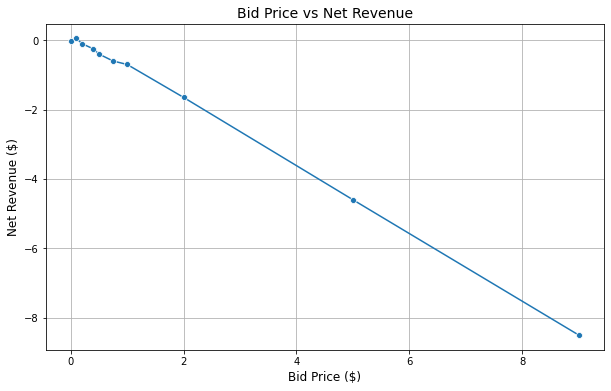

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df1, x='bid_price', y='net_revenue', marker='o')

# Adding title and labels
plt.title('Bid Price vs Net Revenue', fontsize=14)
plt.xlabel('Bid Price ($)', fontsize=12)
plt.ylabel('Net Revenue ($)', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()

### Consulsion
1. For higher bid prices (e.g., $0.75, $1.00, $2.00, etc.), even if the win rate improves, the cost of bidding outweighs the revenue generated from winning.

2. For lower bid prices (e.g., $0.01 or $0.20), the win rate is too low to generate significant revenue, leading to a net loss.

## END OF FILE